**Objective**

The purpose of this notebook is to conduct initial data analysis on the movie recommendation dataset to get an basic understanding
of what needs to be done from before any preprocessing has begun

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The ml-100k folder contains a series of files providing information on 100,000 ratings provided by users and other metadata. Based on what was detailed in the README file, u.item and u.data contains the movie and user related information we need for our user based collaborative model.

In [5]:
# Print out what is contained in u.item file
item_df = pd.read_csv("ml-100k/u.item",sep="|",header=None,encoding='ISO-8859-1')
print(item_df.head())

   0                  1            2   3   \
0   1   Toy Story (1995)  01-Jan-1995 NaN   
1   2   GoldenEye (1995)  01-Jan-1995 NaN   
2   3  Four Rooms (1995)  01-Jan-1995 NaN   
3   4  Get Shorty (1995)  01-Jan-1995 NaN   
4   5     Copycat (1995)  01-Jan-1995 NaN   

                                                  4   5   6   7   8   9   ...  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   0   0   0   1   1  ...   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...   0   1   1   0   0  ...   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...   0   0   0   0   0  ...   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   0   1   0   0   0  ...   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)   0   0   0   0   0  ...   

   14  15  16  17  18  19  20  21  22  23  
0   0   0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   1   0   0  
2   0   0   0   0   0   0   0   1   0   0  
3   0   0   0   0   0   0   0   0   0   0  
4   0   0   0   0   0 

**Observations**
The first two column of u.item contains the movie_id and movie_title, what the rest are the release dates, IMBd URL, and genre.
Since we will be building a user based collaborative system, the only info we really need are movie_id and title

In [29]:
# Check for potential duplicated movie rows
rows_in_item_df = item_df.shape[0]
unique_movie_count = item_df.iloc[:,0].nunique()
if rows_in_item_df == unique_movie_count:
    print("u.item containing %s movies, has no duplicated movies" % unique_movie_count)

u.item containing 1682 movies, has no duplicated movies


In [7]:
# Print out what is contained in u.data file
user_df = pd.read_csv("ml-100k/u.data",sep="\t",header=None,encoding="ISO-8859-1")
print(user_df.head())

     0    1  2          3
0  196  242  3  881250949
1  186  302  3  891717742
2   22  377  1  878887116
3  244   51  2  880606923
4  166  346  1  886397596


**Observations**
The u.data file contains user id, item id, rating given to item, and timestamp. The item id foreign key referencing movie_id from the u.item file.
In our particular case, we will not take into account the time at which user provided the movie rating. Instead we will only use the user id, item id, and rating

In [12]:
# Get number of users contained in this dataset
num_of_users = user_df.iloc[:,0].nunique()
print("Number of users:",num_of_users)

Number of users: 943


In [11]:
# Get general stats on the number of ratings give by each user
count_ratings_per_user = user_df.iloc[:,0].value_counts()
count_ratings_per_user.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: count, dtype: float64

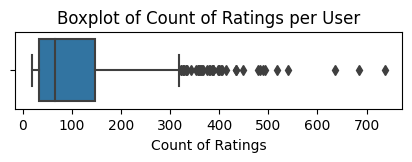

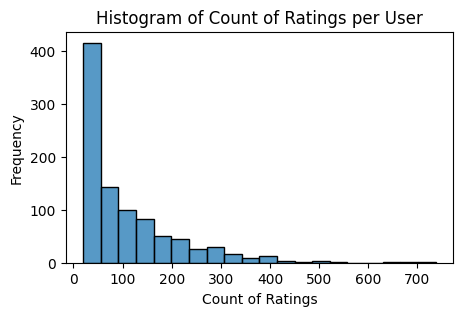

In [23]:
# Plot a boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x=count_ratings_per_user)
plt.title('Boxplot of Count of Ratings per User')
plt.xlabel('Count of Ratings')
plt.show()

# Plot a histogram
plt.figure(figsize=(5, 3))
sns.histplot(count_ratings_per_user, kde=False, bins=20)
plt.title('Histogram of Count of Ratings per User')
plt.xlabel('Count of Ratings')
plt.ylabel('Frequency')
plt.show()

**Observations**
While the minimal count of ratings for a given user is 20, 75% of users fall within 20-148 user counts. The right-skewed histogram provides confirmation to the observation while also showing the existence of outliers.

**Next Step**
Since outliers users with signficantly more ratings than others may introduce bias and cause potential large computational overhead, it would make sense to only considered 0-75% of data within u.data